In [1]:
import csv
import pandas as pd
with open("MW.txt") as data:
    reader = csv.reader(data, delimiter='\t')
    d = list(reader)

for i in d:
    i[6]=[int(i) for i in  i[6].split(',')]
    i[6]=i[6][0:441]
#d[1][6] = [int(i) for i in  d[1][6].split(',')] 

In [2]:
j=1000
for m in d:
    if int(m[5])<j:
        j=int(m[5])
print(j)
print(d[1])

441
['1', '1', 'MW', 'FP1', '1', '889', [83, 74, 65, 65, 66, 55, 43, 25, 18, 20, 26, 33, 41, 38, 28, 36, 55, 60, 56, 58, 72, 85, 76, 69, 74, 83, 86, 88, 97, 112, 114, 109, 99, 76, 54, 50, 66, 86, 97, 99, 96, 86, 82, 73, 69, 70, 70, 60, 65, 71, 69, 64, 57, 54, 56, 58, 50, 20, -20, -56, -74, -69, -57, -57, -60, -69, -75, -71, -59, -45, -24, 3, 13, 10, 8, 10, 5, 7, 8, -3, -22, -28, -20, 1, 3, -10, -18, -12, -19, -23, -25, -36, -45, -43, -37, -23, -4, 4, -2, -3, -3, -2, 5, 8, 7, 5, 16, 29, 34, 35, 36, 48, 68, 80, 80, 75, 68, 69, 77, 89, 105, 100, 80, 64, 56, 59, 64, 57, 49, 42, 48, 60, 75, 77, 70, 61, 45, 28, 24, 28, 29, 34, 40, 50, 42, 27, 16, 4, 1, 6, 12, 16, 20, 24, 34, 44, 54, 58, 53, 40, 24, 11, 4, -4, -14, -34, -56, -76, -77, -68, -53, -44, -38, -35, -30, -30, -30, -25, -6, 18, 29, 27, 23, 27, 41, 50, 51, 57, 57, 51, 55, 57, 58, 53, 37, 20, 9, 12, 29, 49, 49, 37, 28, 37, 57, 76, 83, 74, 68, 50, 25, 9, 13, 39, 71, 103, 121, 130, 132, 136, 146, 163, 184, 188, 171, 152, 152, 164, 166, 1

In [3]:
dataset = pd.DataFrame(d)
X = dataset.iloc[:, 6].values
y = dataset.iloc[:, 4].values
x=[]
Y=[]
for i in y:
    if i == '1':
        Y.append(i)
    else:
        Y.append('0')
for i in X:
    x.append(i)
X = pd.DataFrame(x)
y = pd.DataFrame(Y)
print(y.shape)
X.shape

(67635, 1)


(67635, 441)

In [4]:
X.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
436    0
437    0
438    0
439    0
440    0
Length: 441, dtype: int64

In [5]:
import numpy as np
from numpy.linalg import det, inv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

def ldaLearn(X,y):
    a = np.unique(y)
    print(a)
    means = np.zeros((len(a), X.shape[1]))
    c=0
    x1=[]
    x2=[]
    y=np.array(y)
    print(means.shape)
    print(X.shape[0])
    for k in X:
        if c==X.shape[0]:
            break
        if y[c][0] == '0':
            x1.append(k)
            c=c+1
        else:
            x2.append(k)
            c=c+1
    x1=np.array(x1)
    x2=np.array(x2)
    means[0] = x1.mean(axis=0)
    means[1] = x2.mean(axis=0)
    X=np.array(X)
    y=y.flatten()
    S1 = np.matmul(np.transpose((X[y=='0']-means[0])),(X[y=='0']-means[0]))
    print(S1.shape)
    S2 = np.matmul(np.transpose((X[y=='1']-means[1])),(X[y=='1']-means[1]))
    print(S2.shape)
    covmat = np.cov(X.T)
    return means, covmat,S1,S2

def ldaTest(means,covmat,Xtest,ytest):

    #pre = np.round(pre)
    g = 1 / np.sqrt((2*np.pi**means.shape[1])*det(covmat))
    ll = np.zeros((Xtest.shape[0], means.shape[0]))
    temp = np.array(Xtest)
    for i in range(Xtest.shape[0]):
        for h in range(means.shape[0]):
            b = temp[i] - means[int(h) - 1]
            t = (-1/2)*np.dot(np.dot(b.T, inv(covmat)), b)
            ll[i,int(h)-1] = g * np.e**t 
            
    ypred = np.argmax(ll, axis=1)
    
    acc = 0
    ypred=np.array(ypred)
    ytest=np.array(ytest)
    print(int(ypred[0]))
    print(int(ytest[0][0]))
    for k in range(len(ypred)):
        if int(ypred[k]) == int(ytest[k][0]):
            acc += 1
    acc = acc / len(ypred)
    return acc, np.array(ypred)
# Load the sample data                                                                 

X,y = X_train, y_train

# LDA
means,covmat,S1,S2 = ldaLearn(X,y)

['0' '1']
(2, 441)
54108
(441, 441)
(441, 441)


[[-6.82411587e-07]
 [-8.48867543e-07]
 [-5.24239164e-07]
 ...
 [-4.93375637e-07]
 [-1.10698611e-06]
 [-6.65018425e-07]]
[[-6.82411587e-07 -8.48867543e-07 -5.24239164e-07 ... -4.93375637e-07
  -1.10698611e-06 -6.65018425e-07]]


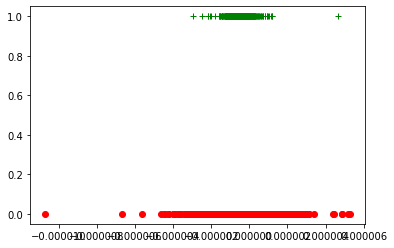

In [6]:
Sw = S1+S2
W = np.matmul(np.linalg.inv(Sw),(means[0]-means[1]))
#W=np.array([W])
W = W.reshape([1,-1])
n=np.dot(X_test,np.transpose(W))
print(n)
cY=np.matmul(W,np.array(np.transpose(X_test)))
print(cY)

Xp1=[]
Xp2=[]
c=0
Yt=np.array(y_test)
cY = np.transpose(cY)
for k in cY:
    if Yt[c][0] == '0':
        Xp1.append(k)
        c=c+1
    else:
        Xp2.append(k)
        c=c+1
            
Xp1=np.array(Xp1)
Xp2=np.array(Xp2)

plt.plot(Xp1.transpose(),0,'ro')
plt.plot(Xp2.transpose(),1,'g+')
plt.show()

In [13]:
ldaacc,ldares = ldaTest(means,covmat,X_test,y_test)
print("W matrix : ", W)
print('LDA Accuracy = '+str(ldaacc))

0
0
W matrix :  [[-2.05442730e-09  2.79983977e-09 -8.59574456e-10 -2.36171720e-09
   3.29356273e-09 -1.41691744e-09 -1.40350286e-09  3.42521972e-09
  -2.65549258e-09 -9.93677978e-10  4.85676979e-09 -1.03636743e-08
   1.26224049e-08 -8.33433818e-09  4.03958338e-09 -2.37126073e-09
   2.49041902e-09 -1.02461289e-09 -1.07515460e-09 -7.50175008e-10
   3.75884817e-09 -3.04590745e-09 -8.49882037e-10  4.34310788e-09
  -3.90244801e-09  7.72542250e-10  2.40006065e-09 -5.34172530e-09
   5.15845738e-09 -6.52332215e-10 -4.16103216e-09  4.56890540e-09
  -2.76705318e-09  2.22962550e-09 -1.82817852e-09 -1.22303825e-09
   4.04509603e-09 -4.61079242e-09  2.53931927e-09 -8.94266315e-10
   1.67590959e-09 -2.80283828e-09  4.02306298e-09 -5.35113616e-09
   4.87767775e-09 -1.56652779e-09 -1.29778013e-09  1.76751762e-09
  -1.65253126e-09  1.09540918e-09 -7.97938208e-10 -1.28940599e-09
   4.37284976e-09 -4.21450874e-09  1.97064719e-09 -1.63287088e-09
   2.44655409e-09 -1.19432806e-09 -5.68079002e-10 -6.8302586

In [22]:
#using built-in function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[7980    0]
 [ 678    0]]
Accuracy0.9216909216909217
